In [2]:
## instantaneous goodput

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sizeSet = [20,30,40,50,60,70,80]
# delaySet = [10,50,100]
schedulerTypes = [0]


# get complete time
# dynamic = ["","1","2"]


def help(i):
    # dir = 'dynamic0-67'
    # dir = 'dynamic1-16'
    # dir = 'dynamic2-181'
    dir = 'peedynamic0-3'
    # file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    # finish_time = float(file.readlines()[-1].split('\t')[0])
    finish_time = 10
    file = open('../results-wns3/'+dir+'/scheduler0'+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == str(i) and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        # if (temp[0] == '3' and len(c_time) == 2):
        #     c_time[1] = c_time[1] + float(temp[5])
            c_time.append(0)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(2)  
tcp = help(1)  

# minrtt = help(1)
# blest = help(2)  
# ecf = help(3)
# mab = help(5)  

print(rr)


      Time  goodput  scheduler
0     1.05      NaN          0
1     1.10      NaN          0
2     1.15      NaN          0
3     1.20  0.00000          0
4     1.25  0.00000          0
..     ...      ...        ...
176   9.85  1.81888          0
177   9.90  1.80856          0
178   9.95  1.79839          0
179  10.00  1.89993          0
180  10.05  1.89042          0

[181 rows x 3 columns]


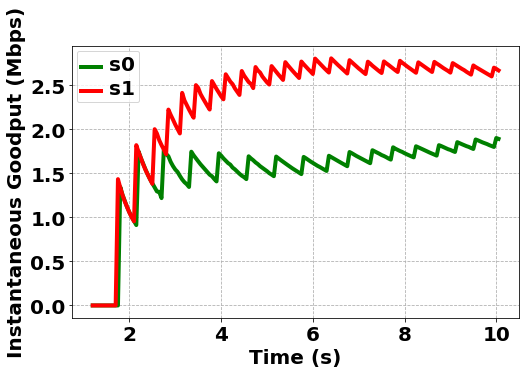

In [3]:

plt.figure(figsize=(8, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
# ax.spines['top'].set_visible(False)  # 去掉上边框
# ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(rr['Time'], rr['goodput'], color="green", label="s0", linewidth=4)
plt.plot(tcp['Time'], tcp['goodput'], color="red", label="s1", linewidth=4)
# plt.plot(blest['Time'], blest['goodput'], color="blue", label="BLEST", linewidth=4)
# plt.plot(ecf['Time'], ecf['goodput'], color="c", label="ECF", linewidth=4)
# plt.plot(mab['Time'], mab['goodput'], color="orange", label="MAB", linewidth=4)

# group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9']  # x轴刻度的标识
plt.xticks(fontsize=20, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=20, fontweight='bold')
# plt.title("Medium Dynamicity", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Instantaneous Goodput (Mbps)", fontsize=20, fontweight='bold')
plt.xlabel("Time (s)", fontsize=20, fontweight='bold')
# plt.xlim(4, 15)  # 设置x轴的范围
# plt.ylim(4, 14)
# plt.ylim(2, 12)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./goodput_low.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
# plt.savefig('./goodput_medium.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
# plt.savefig('./goodput_high.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()


In [161]:
# rr = dataTotal.loc[dataTotal['scheduler'] == "0"]
# minrtt = dataTotal.loc[dataTotal['scheduler'] == "1"]
# blest = dataTotal.loc[dataTotal['scheduler'] == "2"]
# print(mab)